In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
from google.colab import files
uploaded = files.upload()

In [5]:
news_df = pd.read_csv('WELFake_Dataset.csv',index_col=0)

In [6]:
news_df.head()

,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,NaN,Did they post their votes for Hillary already?,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [7]:
news_df['label'].value_counts()

label
1    37106
0    35028
Name: count, dtype: int64

<Axes: >

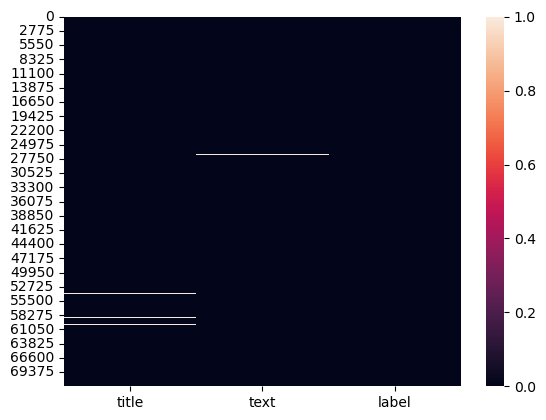

In [8]:
sns.heatmap(news_df.isnull())

In [9]:
news_df.columns.values

array(['title', 'text', 'label'], dtype=object)

In [10]:
news_df = news_df.dropna()

In [ ]:
label=['label']

In [ ]:
final_df = pd.get_dummies(news_df,columns=label,drop_first=True)

In [ ]:
final_df.head()

In [11]:
X=news_df.drop('label',axis=1)
y=news_df['label']

In [12]:
X.shape,y.shape

((71537, 2), (71537,))

In [13]:
y.value_counts()

label
1    36509
0    35028
Name: count, dtype: int64

In [14]:
from tensorflow.keras.layers import Embedding,LSTM,Dense,Dropout,Bidirectional
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot

In [15]:
voc_size=5000

In [16]:
massages=X.copy()

In [17]:
massages = massages[:10000]

In [18]:
massages['title'][9]

'Latest Pipeline Leak Underscores Dangers Of Dakota Access Pipeline'

In [19]:
massages = massages.reset_index()

In [20]:
import nltk
import re
from nltk.corpus import stopwords

In [22]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Sankha
[nltk_data]     Mondal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\Sankha
[nltk_data]     Mondal\AppData\Roaming\nltk_data...


True

In [24]:
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
ps = PorterStemmer()
lem = WordNetLemmatizer()
corpus = []

In [25]:
for i in range(0,len(massages)):
  print(i)
  review = re.sub('[^a-zA-Z]',' ',massages['title'][i])
  review = review.lower()
  review = review.split()

  review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
  review = ' '.join(review)
  corpus.append(review)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [ ]:
for i in range(0,len(massages)):
  print(i)
  review = re.sub('[^a-zA-Z]',' ',massages['title'][i])
  review = review.lower()
  review = review.split()

  review = [lem.lemmatize(word) for word in review if not word in stopwords.words('english')]
  review = ' '.join(review)
  corpus.append(review)

In [26]:
corpus[0]

'law enforc high alert follow threat cop white blacklivesmatt fyf terrorist video'

In [27]:
onehot_repr = [one_hot(words,voc_size) for words in corpus]
onehot_repr

[[4511, 4274, 130, 3058, 2225, 1997, 499, 3910, 1292, 311, 4975, 2778],
 [946,
  3371,
  1096,
  1739,
  85,
  2584,
  568,
  1887,
  3760,
  2213,
  1182,
  4434,
  4764,
  2778],
 [4051, 2543, 4622, 4537, 3481, 4059, 3563, 2069, 1186, 2463, 12, 4253],
 [2311, 2603, 1815, 4459, 4347, 4902, 2860, 579, 1039, 4087, 329],
 [4476, 3563, 1067, 3154, 4601, 3035, 1813, 2070, 1067],
 [279, 3934, 3606, 3949, 2170, 4023, 2265, 4741, 2497, 4002, 4587],
 [3723, 4976, 3346, 466, 2603, 4079, 4059, 4541, 428, 2778],
 [650,
  4969,
  1591,
  3381,
  2474,
  835,
  4810,
  3554,
  331,
  650,
  2516,
  4677,
  423,
  3139,
  2778],
 [1123, 4927, 4611, 1042, 2266, 3673, 4242, 4927],
 [4847, 4202, 1682, 3670, 1450, 2581, 4365, 1384],
 [1926, 2252, 828, 1835, 1934, 4578, 3688, 1204, 3688, 3863],
 [3570, 1331, 466, 2152, 793, 1912, 987, 2446, 3314],
 [112, 1389, 2364, 1331, 959, 580, 4263, 2940, 594, 2486, 109],
 [3909, 4163, 3222, 2864, 4063, 1355, 3848, 2028, 4853, 2895],
 [4277, 2409, 1215, 3596, 4238, 

In [28]:
sent_len=20
embedded_docs = pad_sequences(onehot_repr,padding='pre',maxlen=sent_len)
embedded_docs

array([[   0,    0,    0, ...,  311, 4975, 2778],
       [   0,    0,    0, ..., 4434, 4764, 2778],
       [   0,    0,    0, ..., 2463,   12, 4253],
       ...,
       [   0,    0,    0, ...,  950, 2529, 2516],
       [   0,    0,    0, ..., 4915, 3139, 3967],
       [   0,    0,    0, ..., 1128, 4975, 1182]])

In [29]:
vec_feature=50
model = Sequential()
model.add(Embedding(voc_size,vec_feature,input_length=sent_len))
model.add(LSTM(100))

model.add(Dense(1,kernel_initializer='glorot_uniform',activation='sigmoid'))

model.compile('adam','binary_crossentropy',['accuracy'])

In [30]:
vec_feature=50
model1 = Sequential()
model1.add(Embedding(voc_size,vec_feature,input_length=sent_len))
model1.add(Bidirectional(LSTM(50)))

model1.add(Dense(1,kernel_initializer='glorot_uniform',activation='sigmoid'))

model1.compile('adam','binary_crossentropy',['accuracy'])

In [31]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 50)            250000    
                                                                 
 bidirectional (Bidirection  (None, 100)               40400     
 al)                                                             
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 290501 (1.11 MB)
Trainable params: 290501 (1.11 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
y = y[:10000]

In [33]:
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [34]:
X_final.shape, y_final.shape

((10000, 20), (10000,))

In [35]:
X_final

array([[   0,    0,    0, ...,  311, 4975, 2778],
       [   0,    0,    0, ..., 4434, 4764, 2778],
       [   0,    0,    0, ..., 2463,   12, 4253],
       ...,
       [   0,    0,    0, ...,  950, 2529, 2516],
       [   0,    0,    0, ..., 4915, 3139, 3967],
       [   0,    0,    0, ..., 1128, 4975, 1182]])

In [36]:
y_final

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

In [39]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),
          epochs=10,batch_size=64)

Epoch 1/10
105/105 [==============================] - 4s 17ms/step - loss: 0.5308 - accuracy: 0.7379 - val_loss: 0.3884 - val_accuracy: 0.8270
Epoch 2/10
105/105 [==============================] - 1s 13ms/step - loss: 0.2741 - accuracy: 0.8861 - val_loss: 0.3425 - val_accuracy: 0.8476
Epoch 3/10
105/105 [==============================] - 1s 13ms/step - loss: 0.1829 - accuracy: 0.9258 - val_loss: 0.3615 - val_accuracy: 0.8497
Epoch 4/10
105/105 [==============================] - 1s 13ms/step - loss: 0.1188 - accuracy: 0.9572 - val_loss: 0.4744 - val_accuracy: 0.8476
Epoch 5/10
105/105 [==============================] - 1s 13ms/step - loss: 0.0735 - accuracy: 0.9719 - val_loss: 0.4849 - val_accuracy: 0.8424
Epoch 6/10
105/105 [==============================] - 1s 13ms/step - loss: 0.0453 - accuracy: 0.9845 - val_loss: 0.5535 - val_accuracy: 0.8409
Epoch 7/10
105/105 [==============================] - 1s 13ms/step - loss: 0.0325 - accuracy: 0.9915 - val_loss: 0.7446 - val_accuracy: 0.8370

In [40]:
model1.fit(X_train,y_train,validation_data=(X_test,y_test),
          epochs=5,batch_size=128)

Epoch 1/5
53/53 [==============================] - 5s 30ms/step - loss: 0.6019 - accuracy: 0.6673 - val_loss: 0.3972 - val_accuracy: 0.8209
Epoch 2/5
53/53 [==============================] - 1s 17ms/step - loss: 0.2869 - accuracy: 0.8784 - val_loss: 0.3484 - val_accuracy: 0.8485
Epoch 3/5
53/53 [==============================] - 1s 17ms/step - loss: 0.1879 - accuracy: 0.9316 - val_loss: 0.3812 - val_accuracy: 0.8379
Epoch 4/5
53/53 [==============================] - 1s 17ms/step - loss: 0.1345 - accuracy: 0.9560 - val_loss: 0.4362 - val_accuracy: 0.8345
Epoch 5/5
53/53 [==============================] - 1s 16ms/step - loss: 0.0985 - accuracy: 0.9697 - val_loss: 0.5326 - val_accuracy: 0.8297


<Axes: >

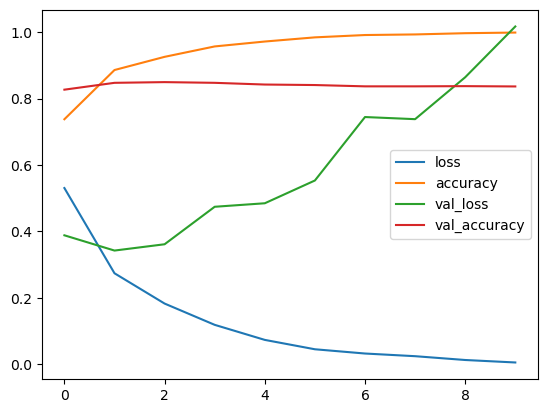

In [41]:
losses = pd.DataFrame(model.history.history)
losses.plot()

<Axes: >

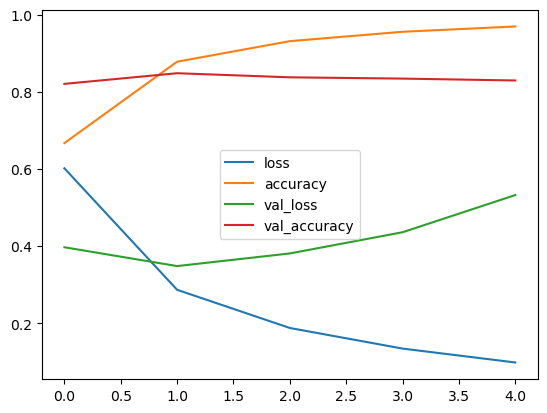

In [42]:
losses = pd.DataFrame(model1.history.history)
losses.plot()

In [43]:
predictions = model.predict(X_test)
predictions = (predictions>0.5)

104/104 [==============================] - 1s 3ms/step


In [44]:
predictions1 = model1.predict(X_test)
predictions1 = (predictions1>0.5)

104/104 [==============================] - 1s 2ms/step


In [45]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [46]:
print('Normal LSTM')
print(confusion_matrix(y_test,predictions))
print('----------------------------------')
print('Bidirectional LSTM')
print(confusion_matrix(y_test,predictions1))

Normal LSTM
[[1318  322]
 [ 217 1443]]
----------------------------------
Bidirectional LSTM
[[1308  332]
 [ 230 1430]]


In [47]:
print('Normal LSTM')
print(classification_report(y_test,predictions))
print('----------------------------------------')
print('Bidirectional LSTM')
print(classification_report(y_test,predictions1))

Normal LSTM
              precision    recall  f1-score   support

           0       0.86      0.80      0.83      1640
           1       0.82      0.87      0.84      1660

    accuracy                           0.84      3300
   macro avg       0.84      0.84      0.84      3300
weighted avg       0.84      0.84      0.84      3300

----------------------------------------
Bidirectional LSTM
              precision    recall  f1-score   support

           0       0.85      0.80      0.82      1640
           1       0.81      0.86      0.84      1660

    accuracy                           0.83      3300
   macro avg       0.83      0.83      0.83      3300
weighted avg       0.83      0.83      0.83      3300



In [48]:
print('Normal LSTM')
print(accuracy_score(y_test,predictions))
print('-------------------------')
print('Bidirectional LSTM')
print(accuracy_score(y_test,predictions1))

Normal LSTM
0.8366666666666667
-------------------------
Bidirectional LSTM
0.8296969696969697
